<div class='alert alert-info'>
    <h1>
        <center><font color='Darkblue'>Linear Discriminant Analysis (LDA)</font></center>
    </h1>
</div>

# <font color='#FF33A1'>✅ What is LDA?</font>

        Linear Discriminant Analysis(LDA) is a 'supervised dimensionality reduction technique' that projects data onto a lower-dimensionality space while maximizing class seperability.

        1.Unlike PCA,which maximizes variance without considering class labels,LDA tries to maximize the distance between classes while minimizing the spread within each class.
        
        2.LDA is commonly used in classification problems.


        It will take  only of the independent variables which are highly depend on  with target varible.Those variables ot take and remaining will be ignore.

        The Main difference with PCA is ,Pca is a Unsupervised Learning that means there we don't have label the model performs on only independent variables,Unike LDA takes label data 

# <font color='#FF33A1'>📊 Why Use LDA?</font>
### <font color='darkblue'>       1.🎯 Class Separability: </font>
        Improves classification performance by projecting data in a way that maximizes class discrimination.
### <font color='darkblue'> 2.⚡ Dimensionality Reduction: </font>
        Reduces high-dimensional data into fewer dimensions.
### <font color='darkblue'>         3.📚 Preprocessing for Classification:</font>
        Often used before applying classifiers like Logistic Regression, SVM, or KNN.


# <font color='#FF33A1'>📚 How LDA Works:</font>
### <font color='Darkblue'>1. Compute Mean and Scatter Matrices</font>
#### <font color='red'>       1.Within-class scatter matrix: </font>Measures spread of samples within each class.
#### <font color='red'>         2.Between-class scatter matrix: </font>Measures distance between class means.
### <font color='Darkblue'>2. Compute Eigenvalues and Eigenvectors</font>
        1.Solve the eigenvalue problem for the matrix:


        Sw^-1Sb


        Where:
        1.𝑆𝑤→ Within-class scatter matrix
        2.Sb​→ Between-class scatter matrix

### <font color='Darkblue'>        3. Select Linear Discriminants</font>
        1.Choose eigenvectors corresponding to the largest eigenvalues to form the discriminant components.
### <font color='Darkblue'> 4. Project Data onto New Space</font>
        1.Transform the original dataset to a new subspace with fewer dimensions.

# <font color='#FF33A1'>📊 Mathematical Representation:</font>

        1.X-> Feature matrix of shape (n x m) ,where;
                1.=number of samples
                2.m=number of features
        2.Sw--> Within-class scatter matrix
        3.Sb--> Between-class scatter matrix
        
        4.W--> Tranformation matrix formed by the eigenvectors
        
                    Z=X x M
        
        5.Z--> Trnsformed daat in reduced dimensions.

# <font color='#FF33A1'>📌 When to Use LDA?</font>
        ✅ When class labels are available.
        ✅ When the goal is to improve classification accuracy.
        ✅ Suitable for multi-class classification.

Explained Variance Ratio: [0.9912126 0.0087874]


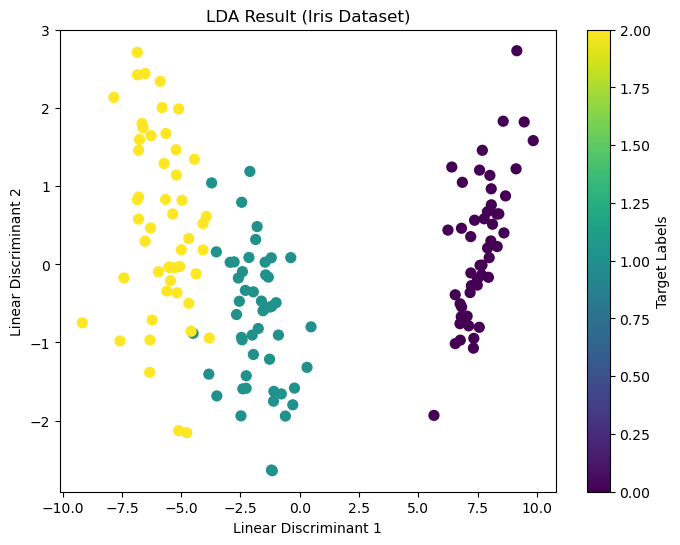

In [15]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load Dataset (Iris Dataset)
data = load_iris()
X = data.data
y = data.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply LDA
lda = LDA(n_components=2)  # Reduce to 2 dimensions
X_lda = lda.fit_transform(X_scaled, y)

# Explained variance ratio
print("Explained Variance Ratio:", lda.explained_variance_ratio_)

# Visualize LDA result
plt.figure(figsize=(8, 6))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='viridis', s=50)
plt.title('LDA Result (Iris Dataset)')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.colorbar(label='Target Labels')
plt.show()


# 📌 Visualizing Explained Variance



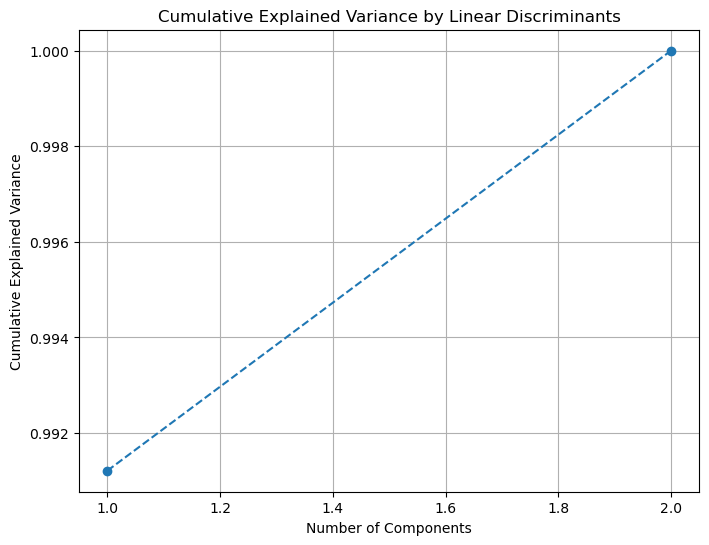

In [17]:
# Plot Cumulative Variance
cumulative_variance = np.cumsum(lda.explained_variance_ratio_)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Linear Discriminants')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()


# 🔥 Comparison of PCA and LDA Results
        If you run both PCA and LDA on the same dataset, you will notice:
        
       1. PCA tries to retain maximum variance, often leading to overlap between classes.
       2. LDA projects the data onto axes that maximize class separability.

# 🚨 Limitations of LDA:
    ❗ Assumes Linearity: Assumes data is linearly separable.
    ❗ Requires Normality: Assumes Gaussian distribution of features.
    ❗ Sensitive to Outliers: Can be affected by noise and outlier

# <center><font color='Darkblue'>Implementation Of LDA</font></center>

In [22]:
#Import the required the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Load the required dataset
dataset=pd.read_csv('Wine.csv')
#Here we have taken the Wine which has class with quality on range of 1 to 5

In [25]:
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


        In this varibles whatever the variables having highly dependent or making impact of getting high accuracy on the target varibles. Those only will be select

In [26]:
dataset.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [29]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [30]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [31]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

In [33]:
#splitting the data train and test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [34]:
# feature scaling ti converting the Standardized data

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [36]:
# Perfomring the LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda=LDA(n_components=2)
x_train=lda.fit_transform(x_train,y_train)
x_test=lda.transform(x_test)

In [44]:
# Using any classification model
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [45]:
y_pred=classifier.predict(x_test)

In [46]:
y_pred

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1], dtype=int64)

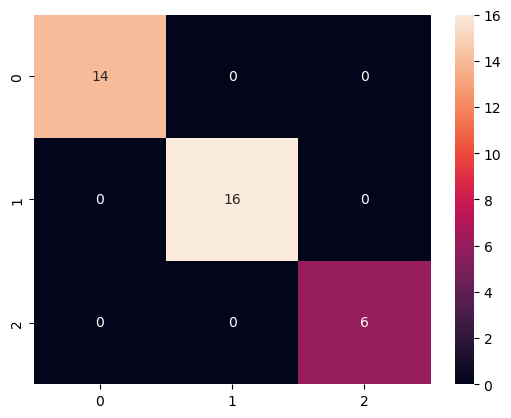

In [48]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.show()

        If see here we didn't see single error,so Mostly our accuarcy will be 1.

In [51]:
accuracy_score(y_test,y_pred)

1.0

        Here we got 100% of accuarcy 

        Here to know the which data points will belongs to which classes ,we can show here visually

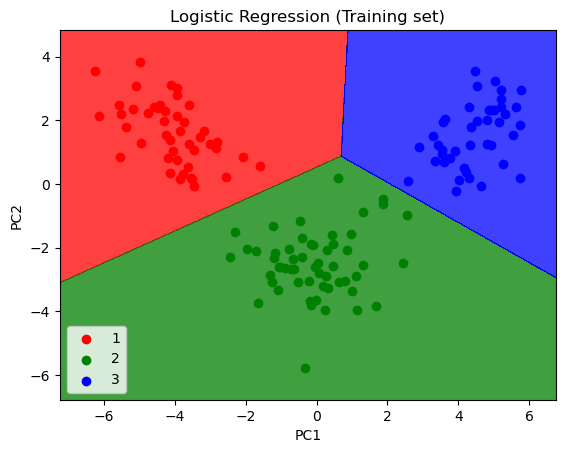

In [55]:
import warnings
warnings.filterwarnings('ignore')
from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

        Here the whatever the data points that having two dimensionaility space that are having most of the information from the older dimensions,,from this 2 varibales ,these are aggregate according to their dependency or relation with certain classs as per the above fig